In [11]:
import nltk
nltk.download('gutenberg')



[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\jupit\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [9]:
from nltk.corpus import gutenberg
file_names = gutenberg.fileids()     #파일 제목을 읽어온다

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [17]:
from nltk.corpus import gutenberg
file_names = gutenberg.fileids()     #파일 제목을 읽어온다


doc_alice = gutenberg.open('carroll-alice.txt').read()
print('#Num of characters used:', len(doc_alice))    #사용된 문자의 수 
print('#Text sample:')
print(doc_alice[:500])    #앞의 500자만 출력

#Num of characters used: 144395
#Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [19]:
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)   #토큰화 실행

print('#Num of tokens used:', len(tokens_alice))
print('#Token sample:')
print(tokens_alice[:20])

#Num of tokens used: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [29]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#모든 토큰에 대해 스테밍 실행
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]

print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])



#Num of tokens after stemming: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#모든 토큰에 대해 스테밍 실행
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]

print('#Num of tokens after lemmatization:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after lemmatization: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [53]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\b[\w']{3,}\b")    #3글자 이상 영어 단어 추출

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])


#Num of tokens with RegexpTokenizer: 21431
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [55]:
from nltk.corpus import stopwords      #일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english'))   #반복되지 않게 set으로 변환

#stopwords를 제외한 단어들만으로 리스트를 생성
result_alice = [word for word in reg_tokens_alice if word not in english_stops]

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])


#Num of tokens after stopword elimination: 12380
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [63]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')
    

#Num of used words: 2461
#Top 20 high frequency words:
'said': 462, 'alice': 386, 'little': 128, 'one': 103, 'know': 88, 'like': 85, 'would': 83, 'went': 83, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'well': 63, 'king': 61, "i'm": 59, 'began': 58, 'turtle': 57, 'way': 56, 'mock': 56, 

In [ ]:
#Python repr() Function returns a printable representation of an object in Python. 
#In other words, we can say that the Python repr() function returns a printable representation of the object 
#by converting that object to a string.

# Example
# s = 'Hello, Geeks.'
# print (repr(s))

# 'Hello, Geeks.'

# In the code, repr(s) returns the string ‘Hello, Geeks.’ enclosed in single quotes.


In [67]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

#빈도수 상위 20개 단어를 출력
print("#Top 20 high freguency words:")
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

#Num of used words: 1649
#Top 20 high freguency words:
'said': 462, 'alice': 294, 'little': 125, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'thought': 54, "i'm": 54, 'mock': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 46, 'see': 45, 'got': 44, 'rabbit': 43, 'looked': 43, 

<function matplotlib.pyplot.show(close=None, block=None)>

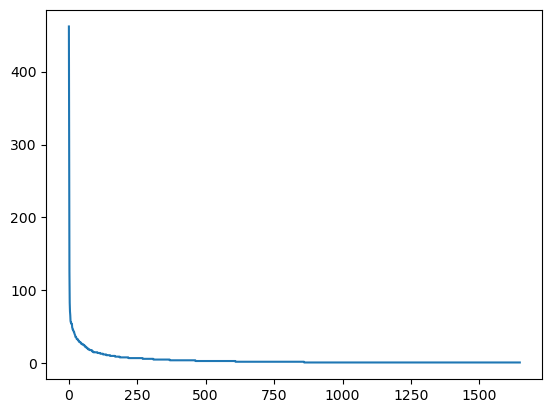

In [69]:
#시각화
import matplotlib.pyplot as plt

#정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
w = [alice_word_count[key] for key in sorted_word_count]
plt.plot(w)
plt.show

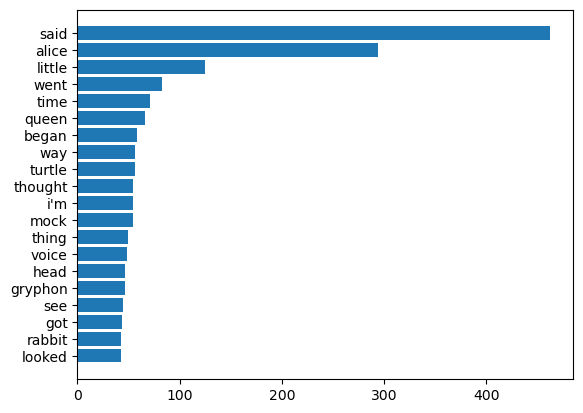

In [71]:
#빈도수 상위 20개의 단어를 추출하여 역순으로 정렬
n = sorted_word_count[:20][::-1]

#추출된 단어에 대해 빈도를 추출
w = [alice_word_count[key] for key in n]

#수평 막대 그래프
plt.barh(range(len(n)), w, tick_label = n)
plt.show()

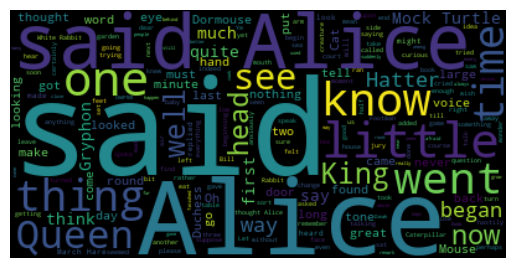

In [73]:
from wordcloud import WordCloud

#Generate a word cloud image
wordcloud = WordCloud().generate(doc_alice)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear') #이미지 출력
plt.show()

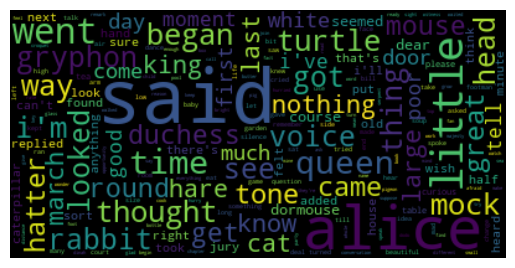

In [75]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

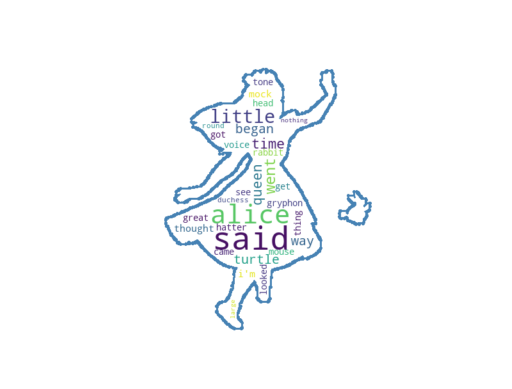

In [81]:
#이미지 적용
import numpy as np
from PIL import Image


#배경이미지를 불러와서 numpy array로 변환
alice_mask = np.array(Image.open("alice_mask.png"))
wc = WordCloud(background_color = "white", #배경색 지정
               max_words = 30,  # 출력할 최대 단어수
               mask = alice_mask, # 배경으로 사용할 이미지
               contour_width = 3, # 테두리선의 크기
               contour_color = 'steelblue') # 테두리선의 색

# 워드 클라우드 생성
wc.generate_from_frequencies(alice_word_count)

#결과를 이미지 파일로 저장
wc.to_file("alice.png")

#화면에 결과를 출력
plt.figure()
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()